![Kyphosis](https://www.mdpi.com/applsci/applsci-09-03322/article_deploy/html/images/applsci-09-03322-g002-550.jpg)
**(a)** A normal spine (without kyphosis); **(b)** Patient with abnormal spine (kyphosis).

**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation



In [3]:
##Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
data.shape

(81, 4)

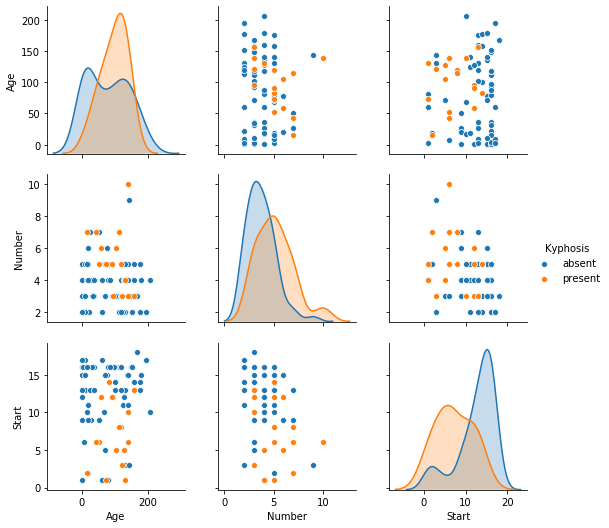

In [6]:
sns.pairplot(data,hue="Kyphosis")

In [7]:
#Splitting the data set into Input and output
#X=data.iloc[;,1:]
X=data.drop("Kyphosis",axis=1)
y=data.Kyphosis

In [8]:
#Train-Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [9]:
#Apply the decision treee algorithm
from sklearn.tree import DecisionTreeClassifier
#intialize of object
dtree = DecisionTreeClassifier(criterion='entropy')
#Apply the classifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
#Predict on training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [11]:
#Classification Report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [12]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [13]:
#predict on test data(unseen data)
#syntax:objectname.predict(inputvales)
y_test_pred = dtree.predict(X_test)
#compare the actual y_test values with model predicted y_test_pred values
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



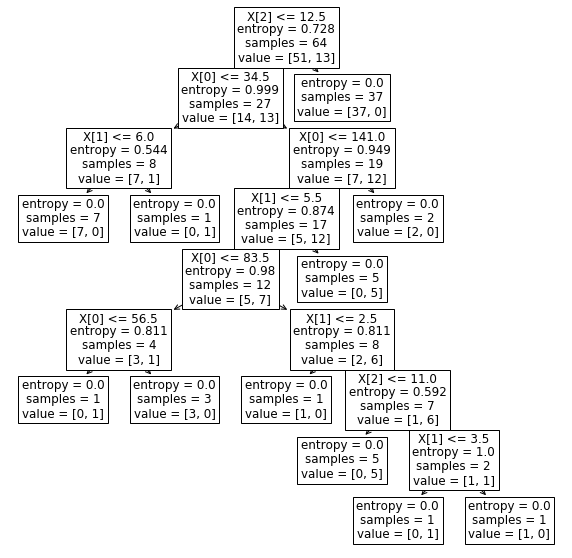

In [14]:
#Visualization of the decision tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(dtree)
plt.show()

In [15]:
#KFOlD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.78571429, 0.76923077, 0.92307692, 0.75      , 0.75      ])

In [16]:
#without splitting if we directly bulid the mode

In [17]:
#Hyperparameters
#GridSearchCV--->find the optinum parameters
#Passing list of values  in a dictionary to find the optimum value for each parameter
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1)
    
}

In [18]:
from sklearn.model_selection import GridSearchCV
#intialization
grid_search = GridSearchCV(estimator=dtree,param_grid=grid_param)
#applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                 

In [19]:
#return the optimal parametres
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4}

In [20]:
#Build the model with best parameters
#Initialized the DT Classifier
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 16, min_samples_leaf= 2)
# We need to fit the model to the data
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
# Prediction on test data
pred_test = clf.predict(X_test)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

      absent       0.77      0.77      0.77        13
     present       0.25      0.25      0.25         4

    accuracy                           0.65        17
   macro avg       0.51      0.51      0.51        17
weighted avg       0.65      0.65      0.65        17



After applying GridSearch, we can say that our scores have been increased to some extent.
### Random Forest Classification

In [22]:
# Import, initialize and fit

#Import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier

# initialize the object for RFC
rfc = RandomForestClassifier()

#fit the RFC to the dataset
rfc.fit(X_train, y_train)

C:\Users\Sri\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
# Predictions on Training data
#SYnatx: objectname.predict(InputValues)
y_pred_train = rfc.predict(X_train)

from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

      absent       0.98      1.00      0.99        51
     present       1.00      0.92      0.96        13

    accuracy                           0.98        64
   macro avg       0.99      0.96      0.98        64
weighted avg       0.98      0.98      0.98        64



In [24]:
# Prediction on test data(unseen data)
y_pred_test = rfc.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



In [25]:
#CrossValidationScore
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rfc, X_train, y_train, cv=5)
np.mean(scores)

0.7945054945054946

In [26]:
# GridSearch for Random Forest Classifier